In [1]:
sys.path.insert(0, '../src')
import numperiods

In [2]:
reload(numperiods)

<module 'numperiods' from '../src/numperiods/__init__.pyc'>

In [3]:
import logging
logging.basicConfig()

logging.getLogger("numperiods.periods").setLevel(logging.INFO)

In [4]:
R.<w,x,y,z> = PolynomialRing(QQ)
%time periods = numperiods.FermatPeriods(R, 4)
%time periods.prim_matrix()
periods.matrix().dimensions()

INFO:numperiods.periods:Computing Fermat periods.
INFO:numperiods.periods:Computing holomorphic periods from primitive periods.


CPU times: user 1.05 ms, sys: 712 µs, total: 1.76 ms
Wall time: 4.48 ms
CPU times: user 119 ms, sys: 15.4 ms, total: 134 ms
Wall time: 138 ms


(1, 22)

In [ ]:
path = [periods]
path.append(numperiods.PeriodsFromDeformation(path[-1].pol + w*x*y*z, path[-1]))
%time path[-1].prim_matrix()

In [ ]:
path[-1].matrix()

In [ ]:
path.append(numperiods.PeriodsFromDeformation(path[-1].pol + x^2*y^2, path[-1]))
%time path[-1].prim_matrix()

In [ ]:
%time pic = numperiods.PicardLattice(path[-1])

In [ ]:
pic.rank

In [ ]:
pic.basis

In [ ]:
pic.threshold()

In [ ]:
pic._expected_threshold
# Not so close...
# I think that some numbers are real and not complex

In [ ]:
[len(pic.smooth_rational_curves(k)) for k in range(1,4)]

In [ ]:
# This is a (probabilistic) symbolic computation. Each time a PicardLattice is constructed,
# it check that the numerical computation coincides with the symbolic one.
numperiods.integer_relations._number_of_lines(pic.periods.pol)

In [ ]:
import logging 
logging.basicConfig()

logging.getLogger("numperiods.family").setLevel(logging.INFO)
logging.getLogger("ore_algebra.analytic").setLevel(logging.INFO)

In [5]:
f = x^4 + y^4 + z^4 + w^4 + 2*w*x*y*z + 3*(x^2*y^2+w^2*z^2)+4*(x^2*z^2+w^2*y^2) + 5*(z^2*y^2+w^2*x^2)
%time periods = numperiods.PeriodsFromDeformation(f, numperiods.FermatPeriods(R,4))
#%time periods.prim_matrix() # about 8 minutes

CPU times: user 17 ms, sys: 3.79 ms, total: 20.8 ms
Wall time: 20.7 ms


In [ ]:
%time pic = numperiods.PicardLattice(periods)

In [ ]:
pic.rank

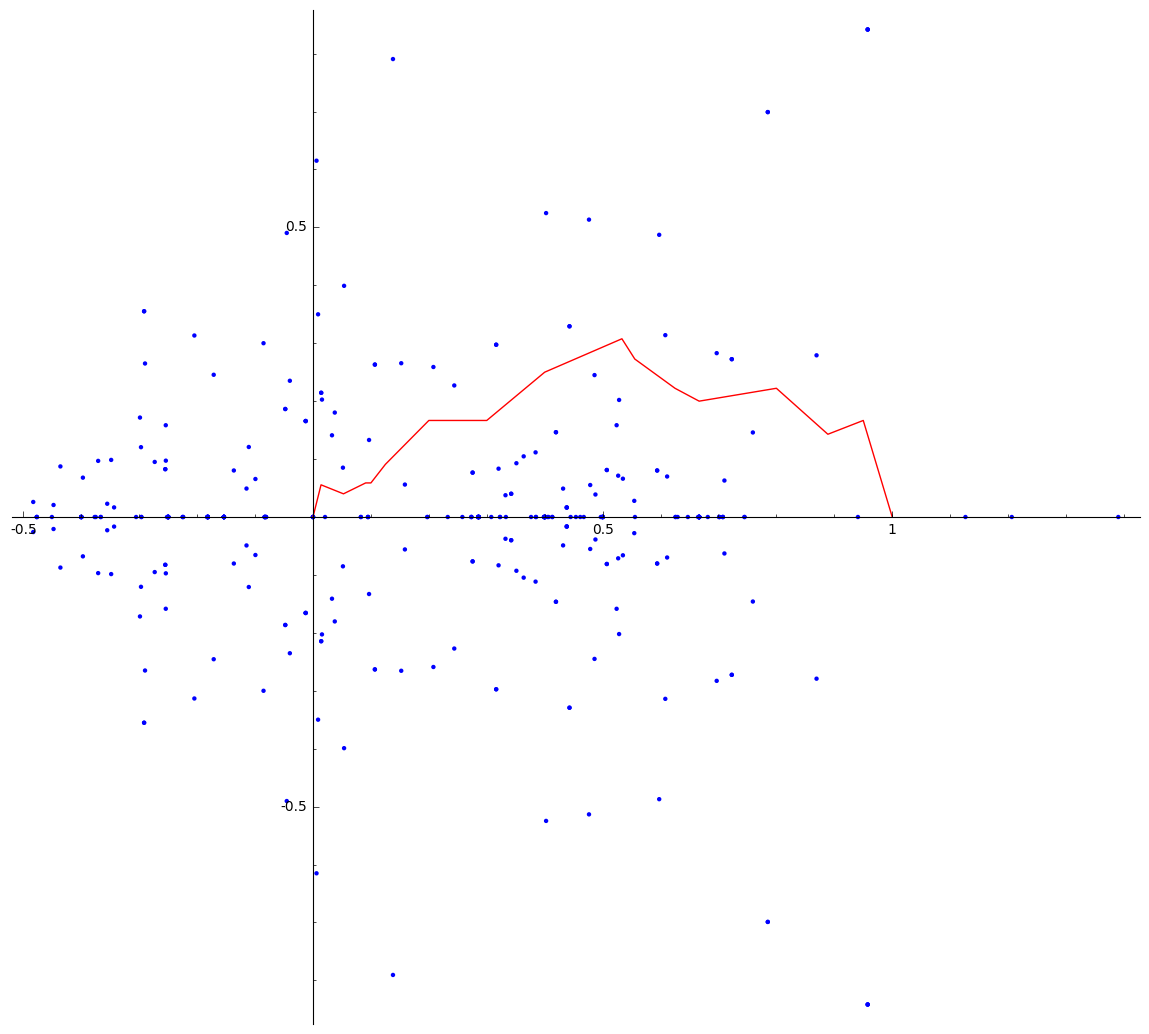

In [6]:
# This is the integration path
list_plot([r for r in periods.family._singularities() if (r-1/2).abs() < 1], aspect_ratio=1, figsize=14) + list_plot(periods.family._nice_path(), True, color="red")

In [6]:
deqs = [periods.family.picard_fuchs_equation(v) for v in periods.family.generators_of_cyclic_decomposition()]

NotImplementedError: cannot construct elements of Univariate Ore algebra in Dt over Univariate Polynomial Ring in t over Rational Field

In [12]:
%time roots = [deq.leading_coefficient().roots(CBF, multiplicities=False) for deq in deqs]

NotImplementedError: root finding for this polynomial not implemented